# README
It is important to have the files in the path /content/drive/My Drive/fileName, then when running you will be prompted to connect your drive.

Libraries used:
  numpy, matplotlib.pyplot, drive, pandas

Question 1:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training MSE with polynomial features: 18317.069254431422
Test MSE with polynomial features: 7759.782697645179


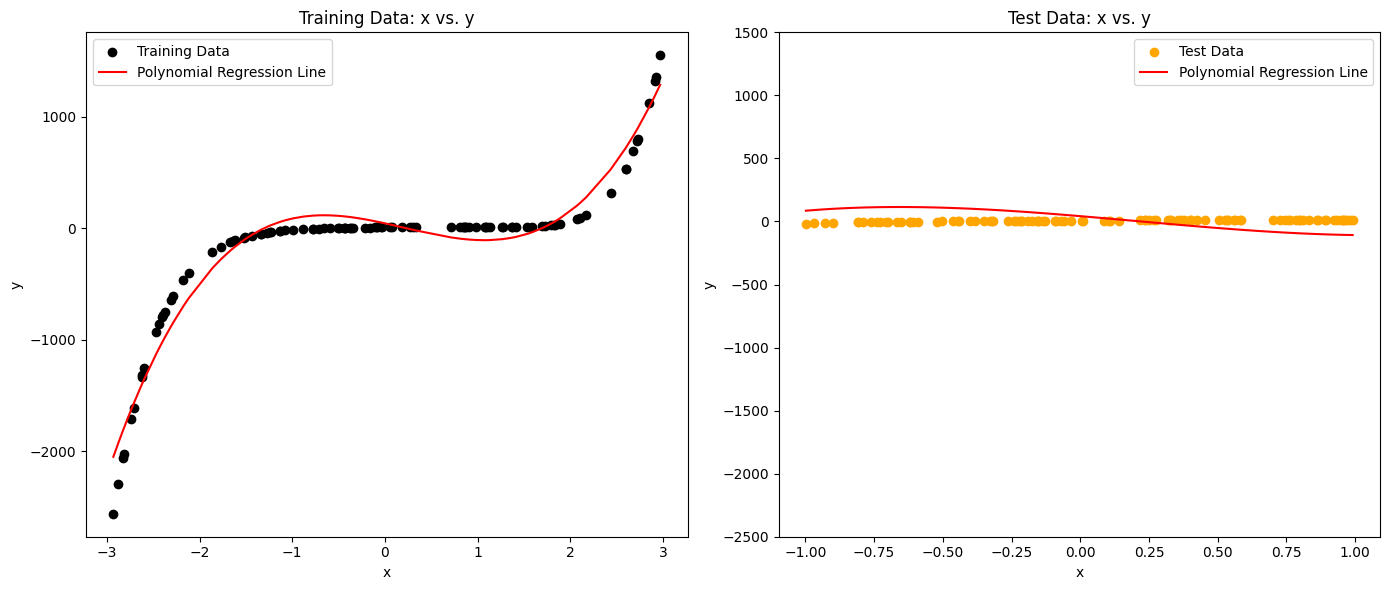

Training MSE: 18317.069254431422
Test MSE: 7759.782697645179
Training RMSE: 135.34056765963197
Test RMSE: 88.0896287745906


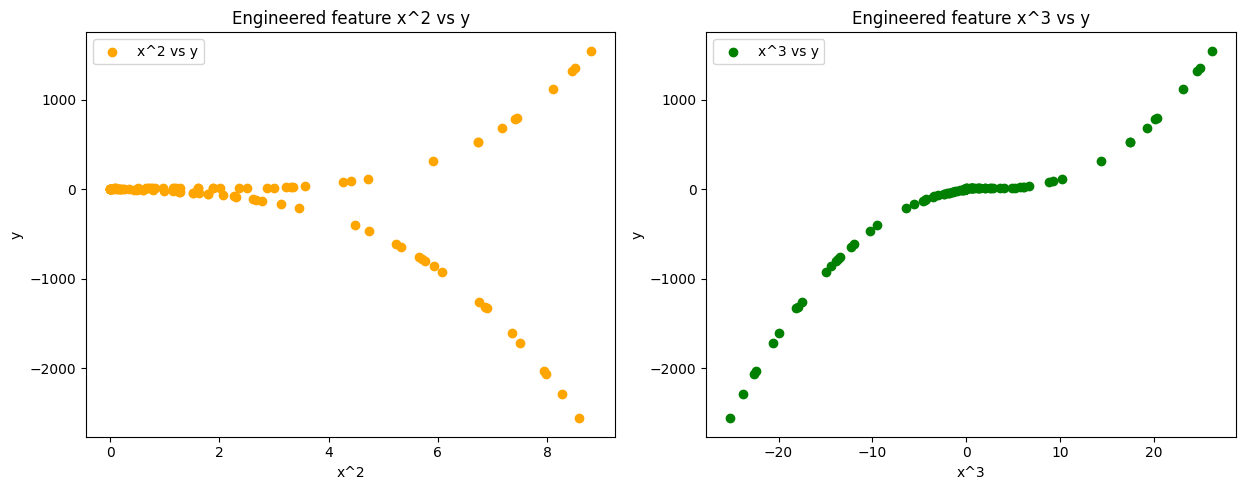

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

x_train = np.load('/content/drive/My Drive/x_train.npy')
y_train = np.load('/content/drive/My Drive/y_train.npy')
x_test = np.load('/content/drive/My Drive/x_test.npy')
y_test = np.load('/content/drive/My Drive/y_test.npy')

# Create polynomial features for the model, let's try cubic features
degree = 3  # Degree of the polynomial
x_train_poly = np.array([x_train**i for i in range(1, degree + 1)]).T
x_test_poly = np.array([x_test**i for i in range(1, degree + 1)]).T

# Compute theta using the normal equation for polynomial regression
X_b_train_poly = np.c_[np.ones((x_train_poly.shape[0], 1)), x_train_poly]  # add intercept term
theta_poly_best = np.linalg.inv(X_b_train_poly.T @ X_b_train_poly) @ X_b_train_poly.T @ y_train

# Make predictions with the polynomial model
y_train_poly_pred = X_b_train_poly @ theta_poly_best
X_b_test_poly = np.c_[np.ones((x_test_poly.shape[0], 1)), x_test_poly]  # add intercept term
y_test_poly_pred = X_b_test_poly @ theta_poly_best

# Evaluate the polynomial model
mse_train_poly = np.mean((y_train - y_train_poly_pred) ** 2)
mse_test_poly = np.mean((y_test - y_test_poly_pred) ** 2)

print(f"Training MSE with polynomial features: {mse_train_poly}")
print(f"Test MSE with polynomial features: {mse_test_poly}")

# Plotting the training and test data with the regression curve
plt.figure(figsize=(14, 6))

# Training data plot with polynomial regression curve
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='black', label='Training Data')
# Sort the points for plotting a smooth curve
sort_axis = np.argsort(x_train)
sorted_x = x_train[sort_axis]
sorted_y_train_pred = y_train_poly_pred[sort_axis]
plt.plot(sorted_x, sorted_y_train_pred, color='red', label='Polynomial Regression Line')
plt.title('Training Data: x vs. y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Test data plot with polynomial regression curve
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, color='orange', label='Test Data')
# Generate a range of x values for plotting the regression curve
x_range = np.linspace(x_test.min(), x_test.max(), 100)
x_range_poly = np.array([x_range**i for i in range(1, degree + 1)]).T
X_b_range_poly = np.c_[np.ones((x_range_poly.shape[0], 1)), x_range_poly]
y_range_poly_pred = X_b_range_poly @ theta_poly_best
plt.plot(x_range, y_range_poly_pred, color='red', label='Polynomial Regression Line')
plt.title('Test Data: x vs. y')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2500, 1500)  # Set the y-axis range as requested
plt.legend()

plt.tight_layout()
plt.show()
mse_train = np.mean((y_train - y_train_poly_pred) ** 2)
rmse_train = np.sqrt(mse_train)

# Calculate MSE and RMSE for the test data
mse_test = np.mean((y_test - y_test_poly_pred) ** 2)
rmse_test = np.sqrt(mse_test)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

# Generate the engineered features
x_squared = x_train ** 2
x_cubed = x_train ** 3

# Plot x vs. y
plt.figure(figsize=(18, 5))

# Plot x^2 vs. y
plt.subplot(1, 3, 2)
plt.scatter(x_squared, y_train, color='orange', label='x^2 vs y')
plt.title('Engineered feature x^2 vs y')
plt.xlabel('x^2')
plt.ylabel('y')
plt.legend()

# Plot x^3 vs. y
plt.subplot(1, 3, 3)
plt.scatter(x_cubed, y_train, color='green', label='x^3 vs y')
plt.title('Engineered feature x^3 vs y')
plt.xlabel('x^3')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

2. a. The relationship is not linear
   b. Yes, we need feature engineering
       i. By creating polynomial features generated from the input variable
       ii. I found x^3 and x^2 to work best, but you could try others such as logarithmic and exponential

Conclusion:
  I realized quite soon that a linear regression model would not work, so I had to use a ploynomial regression model. I used x^2 and x^3 for the polynomial features after some testing. I then used the normal equation to get the model parameters. Just to see, I also calculated MSE and RMSE to make sure I wasn't terribly overfitting, and the data proved that not to be the case.

In [ ]:
Question 2:

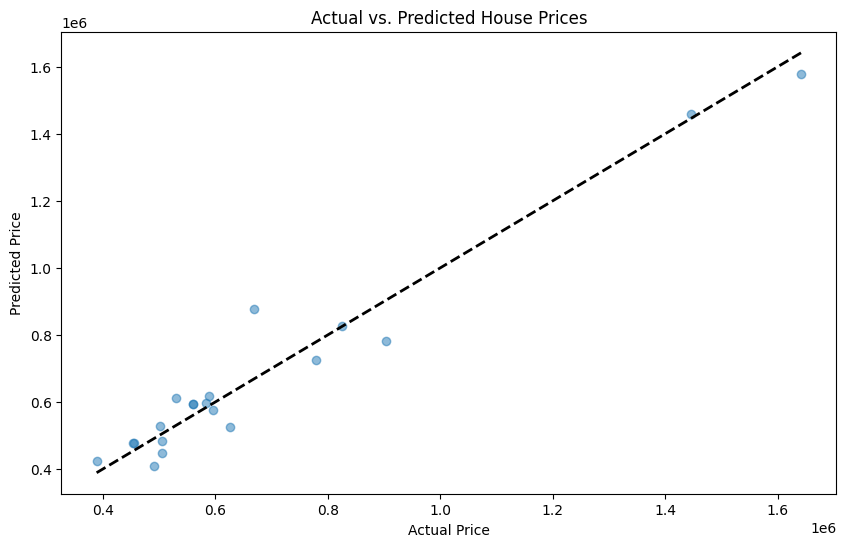

Predicted price of the new listing: $919,996.67


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('/content/drive/My Drive//Housing_data_regression.xlsx')

# Prepare the data
X = df.drop(['House ID', 'Price'], axis=1).values  # Features
y = df['Price'].values  # Target variable

# Function to add intercept term to feature matrix
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

# Function to compute coefficients using the normal equation
def normal_equation(X, y):
    X_b = add_intercept(X)  # add intercept term
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

# Function to predict using the computed coefficients
def predict(X, theta):
    X_b = add_intercept(X)  # Add the intercept term
    return X_b.dot(theta)

# Train the model on the entire dataset
theta = normal_equation(X, y)

# Predict prices using the trained model
predicted_prices = predict(X, theta)

# Visualize the actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_prices, alpha=0.5)
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()

# Example: Estimating the price of a new house listing
# Assuming the new listing has the following features:
# 2 bathrooms, 3.5 land area, 2.0 living area, 2 garages, 7 rooms, 4 bedrooms, 30 years old
X_new = np.array([[2, 3.5, 2.0, 2, 7, 4, 30]])  # Example features of a new house listing
predicted_price_new_listing = predict(X_new, theta)
print(f"Predicted price of the new listing: ${predicted_price_new_listing[0]:,.2f}")


1. The average least squared error was 5,006,561,506
2. The factor that influenced the most was the living area,because it has a coefficient of 228,669. You could use this to predict the price, but might not be quite as accurate
3. The age of the home has the least effect on the price, it had a coefficient of -2133. Removing it might actually improve the model's performance

Question 3:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# Load the data
x_train = np.load('/content/drive/My Drive/x_train.npy')
y_train = np.load('/content/drive/My Drive/y_train.npy')
x_test = np.load('/content/drive/My Drive/x_test.npy')
y_test = np.load('/content/drive/My Drive/y_test.npy')


# Function for feature engineering
def feature_engineering(x, degree=3):
    x_poly = np.hstack([x.reshape(-1, 1)**i for i in range(1, degree + 1)])
    return np.hstack((x_poly, np.ones((x_poly.shape[0], 1))))  # Add bias term

# Locally Weighted Linear Regression function
def lwlr(test_point, X, y, tau=0.1):
    # Initialize weights matrix
    m = X.shape[0]
    weights = np.eye(m)

    # Compute weights for all training examples relative to the test_point
    for i in range(m):
        diff = test_point - X[i, :]
        weights[i, i] = np.exp(-diff.dot(diff.T) / (2.0 * tau**2))

    # Compute theta using the normal equation with weights
    XTX = X.T @ (weights @ X)
    if np.linalg.det(XTX) == 0.0:
        print("Matrix is singular, cannot do inverse")
        return
    theta = np.linalg.inv(XTX) @ (X.T @ (weights @ y))

    # Return the prediction for this particular test_point
    return test_point @ theta

# Prepare the data with polynomial features and bias term
x_train_poly = feature_engineering(x_train)
x_test_poly = feature_engineering(x_test)

# Convert y_train to proper shape
y_train = y_train.reshape(-1, 1)

# Applying LWLR to each test instance and storing predictions
predictions = np.array([lwlr(x_test_poly[i], x_train_poly, y_train, tau=0.5) for i in range(x_test_poly.shape[0])])

# Calculate MSE for predictions
mse_lwlr = np.mean((y_test.reshape(-1, 1) - predictions)**2)
print(f"LWLR MSE: {mse_lwlr}")

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='yellow', label='Test Data')
plt.scatter(x_test, predictions, color='red', label='LWLR Predictions', alpha=0.5)
plt.legend()
plt.title('Locally Weighted Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
#plt.ylim(-5, 5)
plt.show()



1. I used a basis function, however, it is not absolutely necessary for LWLR.
2. The main difference is that standard polynomial regression finds a set of parameters to fit a training set, and that model is used to predict data sets. With LWLR, it gets each point from the training data, and fits a model for it. It computes the weight between test points so it can focus on training points closest to each test point